<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Cambiamos el nombre de las columnas a minúsuclas.
housing.columns=housing.columns.str.lower()
# Estadistica descriptiva de los datos
desc = housing.describe()
desc


,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'medinc'}>,
        <Axes: title={'center': 'houseage'}>,
        <Axes: title={'center': 'averooms'}>],
       [<Axes: title={'center': 'avebedrms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'aveoccup'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

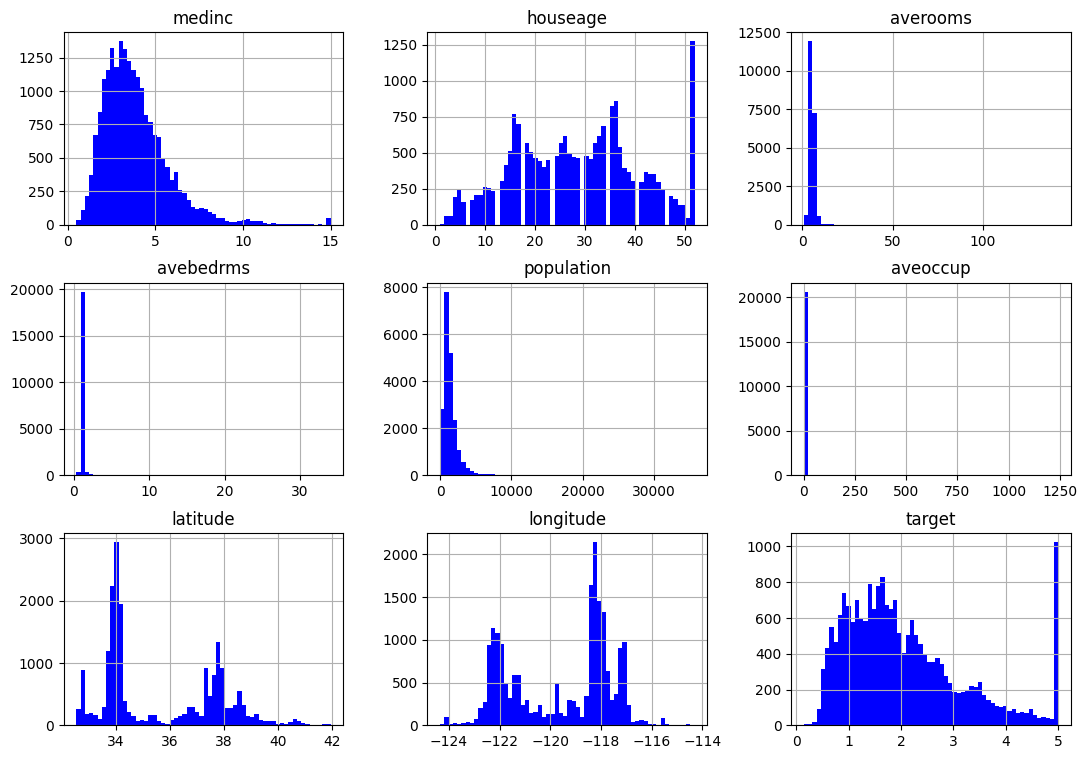

In [5]:
housing.hist(bins=60, figsize=(13,9), color='blue')

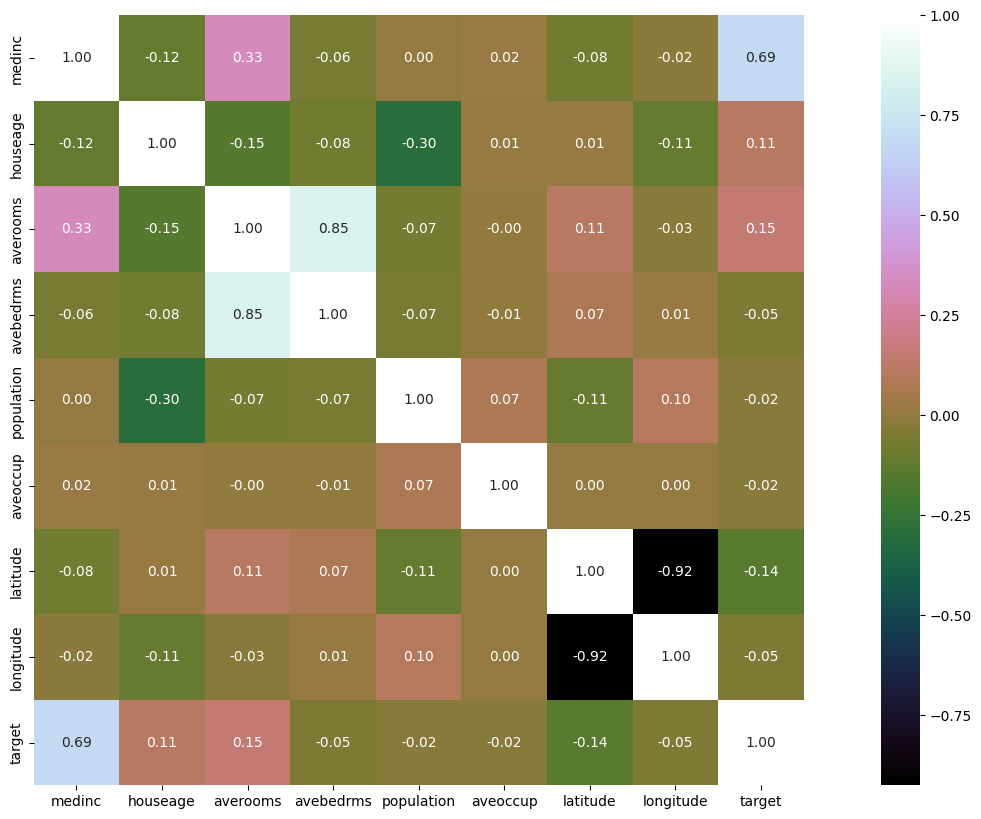

In [6]:
# Gráfico de correlación entre los datos
corr_mat=housing.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix',fmt='.2f')
plt.show()

In [7]:
# sklearn models
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml


from sklearn.metrics import r2_score
# sklearn models
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
class SklearnRegressionModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model

    def test_train_model(self,X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test

    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train)

    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )

        return df_temp

    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = regression_metrics(df_temp)
        df_metrics['r2'] =  round(r2_score(df_temp['y'],df_temp['yhat']),4)

        df_metrics['model'] = self.name_model

        return df_metrics

    def parameters(self,X,y,test_size):
        model_fit = self.fit_model(X,y,test_size)

        list_betas = [
             ('beta_0',model_fit.intercept_)
                ]

        betas = model_fit.coef_

        for num, beta in enumerate(betas):
            name_beta = f'beta_{num+1}'
            list_betas.append((name_beta,round(beta,2)))

        result = pd.DataFrame(
            columns = ['coef','value'],
            data = list_betas
        )

        result['model'] = self.name_model
        return result


In [ ]:
# dataframe
X = housing.drop("target",axis=1)
Y = housing["target"]
# models
reg_lineal = linear_model.LinearRegression()
reg_ridge = linear_model.Ridge(alpha=.5)
reg_lasso = linear_model.Lasso(alpha=0.1)

reg_knn = neighbors.KNeighborsRegressor(5,weights='uniform')
reg_bayesian = linear_model.BayesianRidge()
reg_tree = tree.DecisionTreeRegressor(max_depth=5)
reg_svm = svm.SVR(kernel='linear')


list_models =[
    [reg_lineal,'lineal'],
    [reg_ridge,'ridge'],
    [reg_lasso,'lasso'],
    [reg_knn,'knn'],
    [reg_bayesian,'bayesian'],
    [reg_tree,'decision_tree'],
    [reg_svm,'svm'],
]
frames_metrics = []
frames_coef = []

for model,name_models in list_models:
    fit_model =  SklearnRegressionModels( model,name_models)
    frames_metrics.append(fit_model.metrics(X,Y,0.2))
    if name_models in ['lineal','ridge','lasso']:
        frames_coef.append(fit_model.parameters(X,Y,0.2))
# juntar resultados: metricas
pd.concat(frames_metrics).sort_values('rmse')

In [ ]:
df_metrics = pd.concat(frames_metrics).sort_values('rmse')
metrics = ['rmse', 'r2', 'mae']

plt.figure(figsize=(5, 5))

for metric in metrics:
    sns.scatterplot(x='model',
                    y=metric,
                    data=df_metrics,
                    label=metric)

# Añadir título y etiquetas
plt.title('Comparación de Métricas entre Modelos', fontsize=16)
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Valor de la Métrica', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Métricas')
plt.tight_layout()
plt.show()

La mejor regression es desicion_tree, guiandonos por r2, sin embargo svm tiene los mejores rmse y mae y el peor error cuadrático. Por lo que la elección de modelo más optima es decision tree.

In [ ]:
X = housing.drop("target",axis=1)
Y = housing["target"]
# models
reg_tree = tree.DecisionTreeRegressor(max_depth=5)

frames_metrics = []
frames_coef = []
fit_model =  SklearnRegressionModels(reg_tree,'decision_tree')
frames_metrics.append(fit_model.metrics(X,Y,0.2))
pd.concat(frames_metrics).sort_values('rmse')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entrenar el modelo de DecisionTreeRegressor
reg_tree.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = reg_tree.predict(X_test)

# Calcular el RMSE para mostrar en la gráfica
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Crear un gráfico de dispersión para comparar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='magenta', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=2, linestyle='--')
plt.title(f'Predicciones vs Valores Reales (RMSE: {rmse:.2f})', fontsize=16)
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()